# Expert Finding

In [4]:
import numpy as np
import pandas as pd
import scipy as spy
import seaborn as sns
%matplotlib inline

# Load Data into Python environment

In [5]:
Input=pd.read_excel("C:\\Users\\Ruchi\\Desktop\\BDM\\BigData.xlsx", encoding = 'iso-8859-1')
Input.head()

,UserName,FriendsCount,StatusesCount,FavouriteCount,FollowersCount,ListedCount,RetweetCount,UserNumber
0,µine,160,1163,160,88,3,1,3
1,Abel Coronado,1283,6332,880,1344,269,23,4
2,ACTIBIZZ,3705,2487,2778,2499,642,1,5
3,Alex Cuciureanu,2707,4349,14788,3324,508,0,6
4,AlphaSix Corporation,655,70,19,103,22,0,7


In [6]:
keys= list(Input.columns)
print(keys)

['UserName', 'FriendsCount', 'StatusesCount', 'FavouriteCount', 'FollowersCount', 'ListedCount', 'RetweetCount', 'UserNumber']


# Step 1 - Feature selection  

In [7]:
X=Input[['FriendsCount', 'StatusesCount', 'FavouriteCount', 'FollowersCount', 'ListedCount', 'RetweetCount']]
X.count()

FriendsCount      113
StatusesCount     113
FavouriteCount    113
FollowersCount    113
ListedCount       113
RetweetCount      113
dtype: int64

In [152]:
Y=Input['UserNumber']
Y.count()

115

# Splitting up the data

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)



# Feature selection  

Feature ranking:
1. feature 1 (0.263151)
2. feature 0 (0.218646)
3. feature 2 (0.216285)
4. feature 5 (0.108268)
5. feature 4 (0.099413)
6. feature 3 (0.094236)


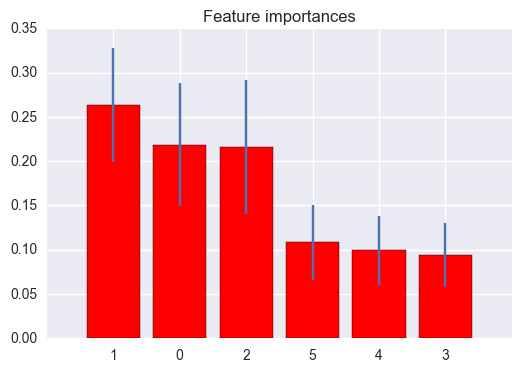

In [154]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
x, y = make_classification(n_samples=150,
                           n_features=6,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

# Convert to matrix for math 

In [155]:
X2=Input[['FriendsCount', 'StatusesCount', 'FavouriteCount']]
X_train=X2.as_matrix()
X2.shape

(115, 3)

In [156]:
Y_train=Y.as_matrix()
Y=np.ravel(Y)
Y.shape = (115,1)
Y.shape

(115, 1)

# Classifying using Random Forest  

In [158]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [159]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)

In [160]:
#y2 = shuffle(Y, random_state=1)
#y2.shape

In [161]:
#y3 = shuffle(y2, random_state=2)
#y3.shape

In [162]:
#Ya = np.vstack((Y, y2)).T
#Ya.shape

In [163]:
X.shape

(115, 6)

In [164]:
multi_target_forest.fit(X, Y)

MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False),
           n_jobs=-1)

In [165]:
multi_target_forest.predict(X_test)
#plt.figure()

array([[ 36],
       [103],
       [ 20],
       [ 37],
       [ 83],
       [ 76],
       [ 11],
       [ 91],
       [  2],
       [ 55],
       [  8],
       [ 44]], dtype=int64)

# Validation using SVM  

In [157]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, Y).predict(X_test)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 36, 103,  69,   8,  69,  76,  11,  91,   2,  55,   8,  44], dtype=int64)